In [1]:
from ddks.data import *
from ddks.data.openimages_dataset import LS
from ddks import methods
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import tqdm

import matplotlib as mpl
plt.style.use('ah')
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['348ABD','E24A33', '988ED5', '777777', 'FBC15E', '8EBA42', 'FFB5B8'])
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
c = mcolors.ColorConverter().to_rgb
cmap1 = make_colormap([c('#777777'), c('#348ADB')])
cmap2 = make_colormap([c('white'), c('#E24A33')])

In [2]:
methods_list = [methods.ddks_method,  methods.vdks_method, methods.rdks_method]
datasets = [MM]#, MM]
sample_size = 50

def within(x, y, eps=1.0E-3):
    return np.abs(x - y) < eps

def return_mean_significance(_method, Dataset, dimension, parameter, sample_size=100, permutations=100):
    if Dataset.name == 'GVM':
        kwargs = dict(mean_p=0.5+parameter, mean_t=0.5)
    elif Dataset.name == 'GVS':
        kwargs = dict(std_p=0.5+parameter, std_t=0.5)
    elif Dataset.name == 'Skew':
        kwargs = dict(lambda_p=0.5+parameter, lambda_t=0.5)
    elif Dataset.name == 'MM':
        kwargs = dict(noise_fraction=parameter)
        
    _dataset = Dataset(dimension=dimension, sample_size=sample_size, **kwargs)
    p, t = next(_dataset)
    d = _method.score_function(p, t)
    return _method(p, t, permutations), d


Ns = np.geomspace(2, 100, 10).astype(int)
noise_fractions = np.linspace(0.0, 1.0, 3)
data = {}
for dataset in datasets:
    data[str(dataset)] = dict()
    print(str(dataset))
    for metric in methods_list:
        print(metric)
        data[str(dataset)][metric.name] = dict()
        p = np.empty((len(Ns), len(noise_fractions)))
        d = np.empty((len(Ns), len(noise_fractions)))
        up = np.empty((len(Ns), len(noise_fractions)))
        ud = np.empty((len(Ns), len(noise_fractions)))
        data[str(dataset)][metric.name]['p'] = p
        data[str(dataset)][metric.name]['d'] = d
        data[str(dataset)][metric.name]['up'] = up
        data[str(dataset)][metric.name]['ud'] = ud
        for i, n in enumerate(tqdm.tqdm(Ns)):
            for j, nf in enumerate(noise_fractions):
                ps = []
                ds = []
                for trial in np.arange(25):
                    _p, _d = return_mean_significance(metric, dataset, dimension=3, sample_size=n, parameter=nf)
                    ps.append(_p)
                    ds.append(_d)
                data[str(dataset)][metric.name]['p'][i, j] = np.nanmean(ps)
                data[str(dataset)][metric.name]['d'][i, j] = np.nanmean(ds)
                data[str(dataset)][metric.name]['up'][i, j] = np.nanstd(ps)
                data[str(dataset)][metric.name]['ud'][i, j] = np.nanstd(ds)

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'ddks.data.MM'>


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [28:55<00:00, 173.59s/it]


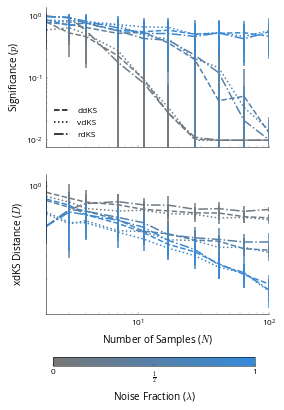

In [6]:
from matplotlib import cm
import matplotlib
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
color_list = ['#cccccc', '#cccccb', '#cccbcb', '#cbcbca', '#cbcbca', '#cbcac9', '#cbcac8', '#cbc9c8', '#cbc9c7', '#cbc9c7', '#cac8c6', '#cac8c5', '#cac8c5', '#cac7c4', '#cac7c4', '#cac7c3', '#cac6c2', '#c9c6c2', '#c9c6c1', '#c9c5c0', '#c9c5c0', '#c9c5bf', '#c9c4bf', '#c9c4be', '#c9c3bd', '#c8c3bd', '#c8c3bc', '#c8c2bb', '#c8c2bb', '#c8c2ba', '#c8c1b9', '#c8c1b9', '#c8c1b8', '#c8c0b7', '#c8c0b7', '#c8c0b6', '#c7bfb5', '#c7bfb5', '#c7bfb4', '#c7beb3', '#c7beb2', '#c7beb2', '#c7bdb1', '#c7bdb0', '#c7bcb0', '#c7bcaf', '#c7bcae', '#c7bbae', '#c7bbad', '#c7bbac', '#c7baab', '#c7baab', '#c7baaa', '#c7b9a9', '#c7b9a8', '#c7b9a8', '#c7b8a7', '#c7b8a6', '#c7b8a5', '#c7b7a5', '#c7b7a4', '#c7b7a3', '#c7b6a2', '#c7b6a2', '#c7b6a1', '#c7b5a0', '#c7b59f', '#c7b59f', '#c7b49e', '#c7b49d', '#c7b49c', '#c7b39b', '#c7b39b', '#c7b39a', '#c7b299', '#c7b298', '#c7b297', '#c7b197', '#c7b196', '#c7b195', '#c7b094', '#c7b093', '#c7b093', '#c7af92', '#c7af91', '#c8af90', '#c8ae8f', '#c8ae8e', '#c8ae8e', '#c8ad8d', '#c8ad8c', '#c8ad8b', '#c8ac8a', '#c8ac89', '#c8ac89', '#c8ab88', '#c9ab87', '#c9ab86', '#c9aa85', '#c9aa84', '#c9aa83', '#c9a982', '#c9a982', '#c9a981', '#c9a880', '#caa87f', '#caa87e', '#caa77d', '#caa77c', '#caa77b', '#caa67a', '#caa67a', '#cba679', '#cba578', '#cba577', '#cba576', '#cba475', '#cba474', '#cca473', '#cca372', '#cca371', '#cca370', '#cca26f', '#cda26e', '#cda26d', '#cda16d', '#cda16c', '#cda16b', '#cda06a', '#cea069', '#cea068', '#ce9f67', '#ce9f66', '#cf9f65', '#cf9f64', '#cf9e63', '#cf9e62', '#cf9e61', '#d09d60', '#d09d5f', '#d09d5e', '#d09c5d', '#d19c5c', '#d19c5b', '#d19b5a', '#d19b59', '#d29b58', '#d29a57', '#d29a56', '#d29a55', '#d39954', '#d39953', '#d39952', '#d39851', '#d49850', '#d4984f', '#d4984e', '#d5974d', '#d5974c', '#d5974b', '#d59649', '#d69648', '#d69647', '#d69546', '#d79545', '#d79544', '#d79443', '#d89442', '#d89441', '#d89340', '#d9933f', '#d9933e', '#d9933d', '#da923c', '#da923a', '#da9239', '#db9138', '#db9137', '#db9136', '#dc9035', '#dc9034', '#dc9033', '#dd8f32', '#dd8f30', '#dd8f2f', '#de8f2e', '#de8e2d', '#df8e2c', '#df8e2b', '#df8d2a', '#e08d29', '#e08d27', '#e08c26', '#e18c25', '#e18c24', '#e28c23', '#e28b22', '#e28b20', '#e38b1f', '#e38a1e', '#e48a1d', '#e48a1c', '#e5891b', '#e4891a', '#e48919', '#e48819', '#e48818', '#e48818', '#e38717', '#e38717', '#e38716', '#e38615', '#e38615', '#e28514', '#e28514', '#e28513', '#e28413', '#e28412', '#e18412', '#e18311', '#e18311', '#e18310', '#e08210', '#e0820f', '#e0810e', '#e0810e', '#df810d', '#df800d', '#df800c', '#df800c', '#de7f0b', '#de7f0b', '#de7f0a', '#de7e0a', '#dd7e0a', '#dd7d09', '#dd7d09', '#dd7d08', '#dc7c08', '#dc7c07', '#dc7c07', '#db7b06', '#db7b06', '#db7a05', '#db7a05', '#da7a04', '#da7904', '#da7903', '#d97903', '#d97803', '#d97802', '#d87702', '#d87701', '#d87701', '#d77600', '#d77600']
lss = {'ddKS': '--', 'vdKS': ':', 'rdKS': '-.'}
fig, axes = plt.subplots(nrows=2, ncols=1, tight_layout=False, figsize=(4, 6), sharex=True)
cmap = cmap1#matplotlib.colors.ListedColormap(color_list, name='pnnl_brand')#cm.get_cmap('plasma')
for ax in axes:
    make_axes_locatable(ax)
for dataset in datasets:
    for metric in methods_list:
        for j, nf in enumerate(noise_fractions):
            _p = data[str(dataset)][metric.name]['p'][:, j]
            _d = data[str(dataset)][metric.name]['d'][:, j]
            _up = data[str(dataset)][metric.name]['up'][:, j]
            _ud = data[str(dataset)][metric.name]['ud'][:, j]
            axes[0].errorbar(Ns, _p, yerr=_up, ls=lss[metric.name], color=cmap(0.8*nf+.1))
            axes[1].errorbar(Ns, _d, yerr=_ud, ls=lss[metric.name], color=cmap(0.8*nf+.1))
plt.sca(axes[0])
im = plt.imshow([[-1.2, 0.0], [1.2, 0.0]], extent=[-100, -101, 0.5, 0.6], cmap=cmap)
for metric_name, ls in lss.items():
    plt.plot([np.nan, np.nan], [np.nan, np.nan], ls=ls, label=metric_name, color='black')
plt.gca().set_aspect('auto')
plt.loglog()
plt.legend(loc=3)
plt.xlim(2, 100)
plt.ylabel('Significance ($p$)')
plt.sca(axes[1])
plt.loglog()
plt.xlim(2, 100)
plt.ylabel('xdKS Distance ($D$)')
plt.xlabel('Number of Samples ($N$)')


fig.subplots_adjust(bottom=0.17)
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

cbar.set_label(r'Noise Fraction ($\lambda$)')
cbar.set_ticks([-1.2, 0.0, 1.2])
cbar.set_ticklabels(['0', r'$\frac{1}{2}$', '1'])
#plt.tight_layout()
plt.savefig('xdks_methods.pdf', bbox_inches='tight')
plt.show()